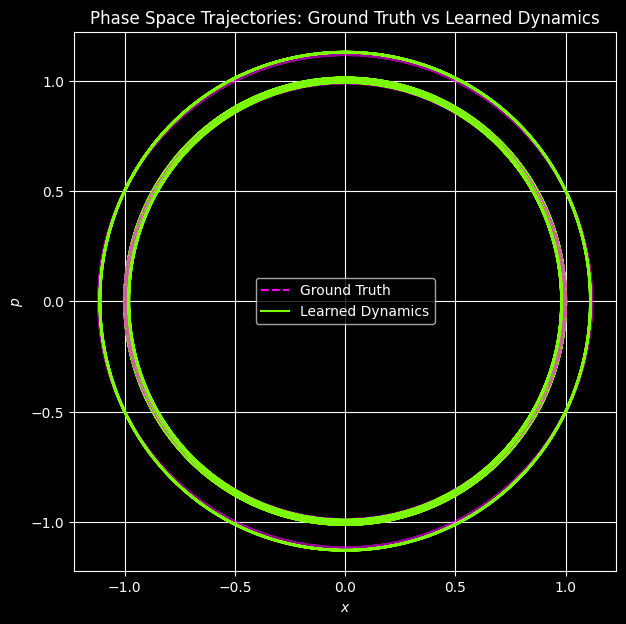

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Physical parameters
# -----------------------------
m = 1.0       # mass
k = 1.0       # spring constant
omega = np.sqrt(k / m)

# -----------------------------
# Ground-truth Hamiltonian flow
# -----------------------------
def sho_true(t, y):
    x, p = y
    dxdt = p / m
    dpdt = -k * x
    return [dxdt, dpdt]

# -----------------------------
# "Learned" dynamics (slightly imperfect)
# -----------------------------
def sho_learned(t, y):
    x, p = y
    dxdt = p / m
    dpdt = -k * x * (1 + 0.05 * x**2)  # small nonlinear distortion
    return [dxdt, dpdt]

# -----------------------------
# Time span and ICs
# -----------------------------
t_span = (0, 20)
t_eval = np.linspace(*t_span, 2000)

initial_conditions = [
    (1.0, 0.0),
    (0.0, 1.0),
    (0.7, 0.7),
    (-1.0, 0.5),
]

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(7, 7))

for x0, p0 in initial_conditions:
    # Ground truth
    sol_true = solve_ivp(
        sho_true, t_span, [x0, p0], t_eval=t_eval, rtol=1e-9
    )
    plt.plot(
        sol_true.y[0], sol_true.y[1],
        ls="--", color="magenta", lw=2, alpha=0.6
    )

    # Learned
    sol_learned = solve_ivp(
        sho_learned, t_span, [x0, p0], t_eval=t_eval, rtol=1e-9
    )
    plt.plot(
        sol_learned.y[0], sol_learned.y[1],
        color="#7CFC00", linewidth=2
    )

# -----------------------------
# Labels & aesthetics
# -----------------------------
plt.xlabel(r"$x$")
plt.ylabel(r"$p$")
plt.title("Phase Space Trajectories: Ground Truth vs Learned Dynamics")
plt.axis("equal")
plt.grid(True)

# Legend proxy
plt.plot([], [], linestyle="--", color="magenta", label="Ground Truth")
plt.plot([], [], color="#7CFC00", label="Learned Dynamics")
plt.legend()

plt.show()